# Importing all the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Mounting the google drive
#from google.colab import drive
#drive.mount('/content/drive')

# Loading the Datasets

In [3]:
data1 = pd.read_csv('/content/length-of-unemployment-2022.csv')
data2 = pd.read_csv('/content/unemployment-by-local-authorities.csv')
data3 = pd.read_csv('/content/unemployment-by-region-2022.csv')

# Data Pre - Processing

In [4]:
data1.sample()

,length_of_unemployment,measure,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,value_type,confidence_interval,numerator,denominator,sample_size
142427,Unknown,Length of time spent in unemployment,Indian,Detailed,Jan2007-Dec2007,year,South East,Region,65+,16+,Women,?,%,?,?,?,?


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   measure              23256 non-null  object
 1   ethnicity            23256 non-null  object
 2   ethnicity_type       23256 non-null  object
 3   time                 23256 non-null  object
 4   time_type            23256 non-null  object
 5   Geography            23256 non-null  object
 6   Geography_type       23256 non-null  object
 7   age                  23256 non-null  object
 8   value                23256 non-null  object
 9   confidence_interval  23256 non-null  object
 10  numerator            23256 non-null  object
 11  denominator          23256 non-null  object
 12  sample_size          23256 non-null  object
dtypes: object(13)
memory usage: 2.3+ MB


In [6]:
data3.drop('measure', axis=1, inplace=True)

In [7]:
data3.drop('value_type', axis=1, inplace=True)

In [8]:
# Save data3 to a CSV file
data3.to_csv('modified_data3.csv', index=False)


In [10]:
# Save data3 to a CSV file at a specific path
data3.to_csv('/content/modified_data3.csv', index=False)

In [11]:
data3.head(4)

,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,All,All,Jan2004-Dec2004,year,All,Great Britain,16-24,16+,All,12.3,0.3,553800,4488200,49218
1,All,All,Jan2005-Dec2005,year,All,Great Britain,16-24,16+,All,13,0.3,591300,4536300,46261
2,All,All,Jan2006-Dec2006,year,All,Great Britain,16-24,16+,All,13.9,0.4,637900,4575700,33854
3,All,All,Jan2007-Dec2007,year,All,Great Britain,16-24,16+,All,13.8,0.4,638900,4613200,33686


In [12]:
print("\nModified Data:")
print(data1.head())



Modified Data:
  length_of_unemployment                               measure ethnicity  \
0             0-3 months  Length of time spent in unemployment       All   
1             0-3 months  Length of time spent in unemployment       All   
2             0-3 months  Length of time spent in unemployment       All   
3             0-3 months  Length of time spent in unemployment       All   
4             0-3 months  Length of time spent in unemployment       All   

  ethnicity_type             time time_type geography geography_type    age  \
0            All  Jan2004-Dec2004      year       All  Great Britain  16-24   
1            All  Jan2005-Dec2005      year       All  Great Britain  16-24   
2            All  Jan2006-Dec2006      year       All  Great Britain  16-24   
3            All  Jan2007-Dec2007      year       All  Great Britain  16-24   
4            All  Jan2008-Dec2008      year       All  Great Britain  16-24   

  age_type  sex value value_type confidence_interval

In [13]:
new_column_names = {
    'Geography': 'geography',
    'Geography_type':'geography_type'
}

In [17]:
# Renaming columns
data2.rename(columns=new_column_names, inplace=True)

In [18]:
data1.head()

,length_of_unemployment,geography,geography_type,age_type,sex,confidence_interval,numerator,denominator,sample_size
0,0-3 months,All,Great Britain,16+,All,1.5,314300,553800,4057
1,0-3 months,All,Great Britain,16+,All,1.5,321100,591300,4064
2,0-3 months,All,Great Britain,16+,All,1.7,318700,637900,3330
3,0-3 months,All,Great Britain,16+,All,1.7,308200,638900,3236
4,0-3 months,All,Great Britain,16+,All,1.7,333600,700200,3412


In [19]:
cols = ['length_of_unemployment', 'geography', 'geography_type', 'age_type', 'sex','confidence_interval','numerator','denominator','sample_size']
data1 = data1[cols]

In [20]:
cols1 = ['ethnicity', 'measure', 'geography']
data2 = data2[cols1]

In [21]:
# Renaming columns
data2.rename(columns=new_column_names, inplace=True)

<ipython-input-21-f54ee1f75881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns=new_column_names, inplace=True)


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ethnicity  23256 non-null  object
 1   measure    23256 non-null  object
 2   geography  23256 non-null  object
dtypes: object(3)
memory usage: 545.2+ KB


# Merging the datasets

In [23]:

merged_df = pd.merge(data1, data2, on='geography', how='inner')

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844740 entries, 0 to 844739
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   length_of_unemployment  844740 non-null  object
 1   geography               844740 non-null  object
 2   geography_type          844740 non-null  object
 3   age_type                844740 non-null  object
 4   sex                     844740 non-null  object
 5   confidence_interval     844740 non-null  object
 6   numerator               844740 non-null  object
 7   denominator             844740 non-null  object
 8   sample_size             844740 non-null  object
 9   ethnicity               844740 non-null  object
 10  measure                 844740 non-null  object
dtypes: object(11)
memory usage: 70.9+ MB


# Data Cleaning

In [25]:
# Convert 'value' column to numeric, handling non-numeric values as NaN
merged_df['confidence_interval'] = pd.to_numeric(merged_df['confidence_interval'], errors='coerce')


# Now fill missing values with the mean
merged_df['confidence_interval'].fillna(merged_df['confidence_interval'].mean(), inplace=True)

In [26]:
# Converting 'value' column to numeric, handling non-numeric values as NaN
merged_df['numerator'] = pd.to_numeric(merged_df['numerator'], errors='coerce')



merged_df['numerator'].fillna(merged_df['numerator'].mean(), inplace=True)


merged_df['denominator'] = pd.to_numeric(merged_df['denominator'], errors='coerce')


merged_df['denominator'].fillna(merged_df['denominator'].mean(), inplace=True)

# Convert 'value' column to numeric, handling non-numeric values as NaN
merged_df['sample_size'] = pd.to_numeric(merged_df['sample_size'], errors='coerce')


# Now fill missing values with the mean
merged_df['sample_size'].fillna(merged_df['sample_size'].mean(), inplace=True)

In [27]:
merged_df.to_csv('Cleaned_data.csv', index = False)

In [28]:
clean_data = pd.read_csv('/content/Cleaned_data.csv')

In [29]:
clean_data.sample(5)

,length_of_unemployment,geography,geography_type,age_type,sex,confidence_interval,numerator,denominator,sample_size,ethnicity,measure
743304,Unknown,All,Great Britain,16+,Women,6.30648,67543.61991,265854.823529,1228.60543,White,% of individuals unemployed
628216,3-12 months,All,Great Britain,16+,Men,6.30648,67543.61991,265854.823529,1228.60543,White,% of individuals unemployed
686073,Unknown,All,Great Britain,16+,All,6.30648,67543.61991,265854.823529,1228.60543,White,% of individuals unemployed
309704,1+ years,All,Great Britain,16+,All,6.30648,67543.61991,265854.823529,1228.60543,White,% of individuals unemployed
125982,0-3 months,All,Great Britain,16+,Women,6.30648,67543.61991,265854.823529,1228.60543,All,% of individuals unemployed


# Data Visualisation

In [ ]:
import pandas as pd
data4 = pd.read_csv('/content/drive/MyDrive/unemployement/Cleaned_data (1).csv')

In [ ]:

data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844740 entries, 0 to 844739
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   length_of_unemployment  844740 non-null  object 
 1   geography               844740 non-null  object 
 2   geography_type          844740 non-null  object 
 3   age_type                844740 non-null  object 
 4   sex                     844740 non-null  object 
 5   confidence_interval     844740 non-null  float64
 6   numerator               844740 non-null  float64
 7   denominator             844740 non-null  float64
 8   sample_size             844740 non-null  float64
 9   ethnicity_type          844740 non-null  object 
 10  ethnicity               844740 non-null  object 
 11  measure                 844740 non-null  object 
dtypes: float64(4), object(8)
memory usage: 77.3+ MB


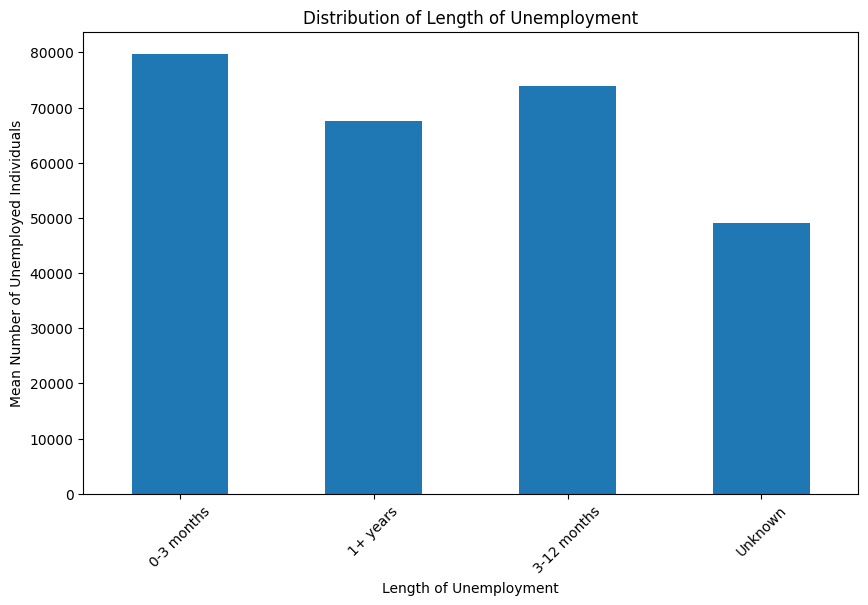

In [ ]:

# Filter data for % of individuals unemployed
unemployment_data = data4[data4['measure'] == '% of individuals unemployed']

# Group by length_of_unemployment and calculate the mean numerator
length_of_unemployment_dist = unemployment_data.groupby('length_of_unemployment')['numerator'].mean()

# Plot the distribution of the length of unemployment
plt.figure(figsize=(10, 6))
length_of_unemployment_dist.plot(kind='bar')
plt.title('Distribution of Length of Unemployment')
plt.xlabel('Length of Unemployment')
plt.ylabel('Mean Number of Unemployed Individuals')
plt.xticks(rotation=45)
plt.show()


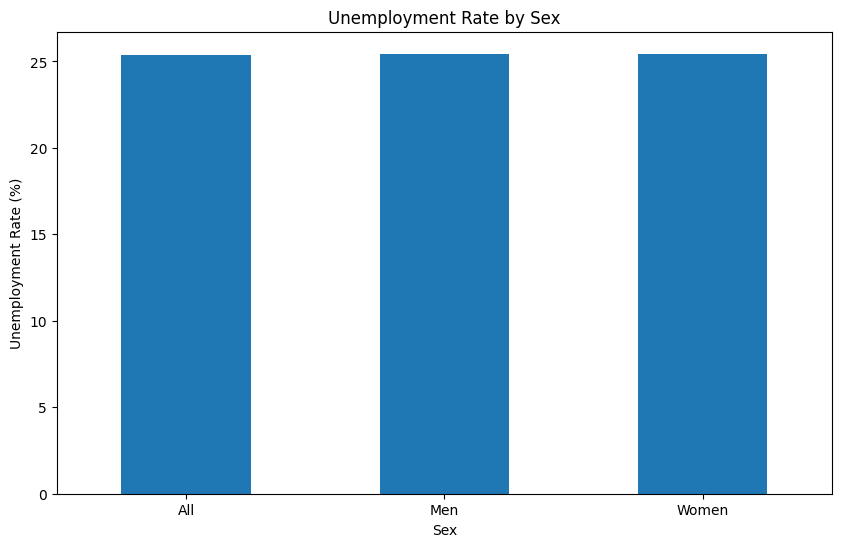

In [ ]:
# Group by sex and calculate the mean numerator and denominator to get the unemployment rate
unemployment_by_sex = unemployment_data.groupby('sex').apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
)

# Plot the unemployment rate by sex
plt.figure(figsize=(10, 6))
unemployment_by_sex.plot(kind='bar')
plt.title('Unemployment Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.show()


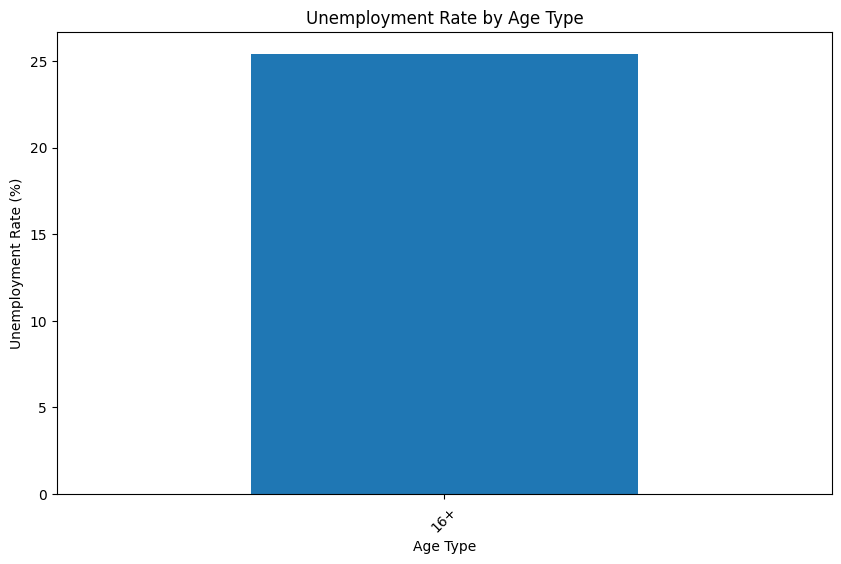

In [ ]:
# Group by age_type and calculate the mean numerator and denominator to get the unemployment rate
unemployment_by_age = unemployment_data.groupby('age_type').apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
)

# Plot the unemployment rate by age type
plt.figure(figsize=(10, 6))
unemployment_by_age.plot(kind='bar')
plt.title('Unemployment Rate by Age Type')
plt.xlabel('Age Type')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


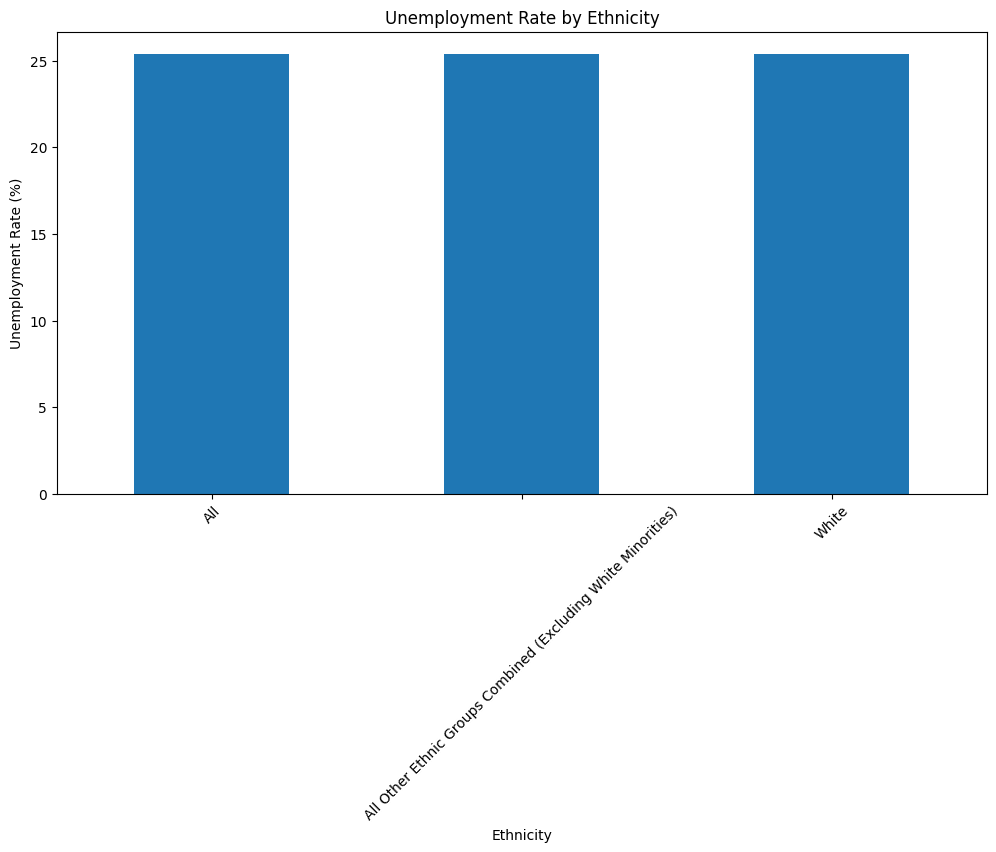

In [ ]:
# Group by ethnicity and calculate the mean numerator and denominator to get the unemployment rate
unemployment_by_ethnicity = unemployment_data.groupby('ethnicity').apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
)

# Plot the unemployment rate by ethnicity
plt.figure(figsize=(12, 6))
unemployment_by_ethnicity.plot(kind='bar')
plt.title('Unemployment Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


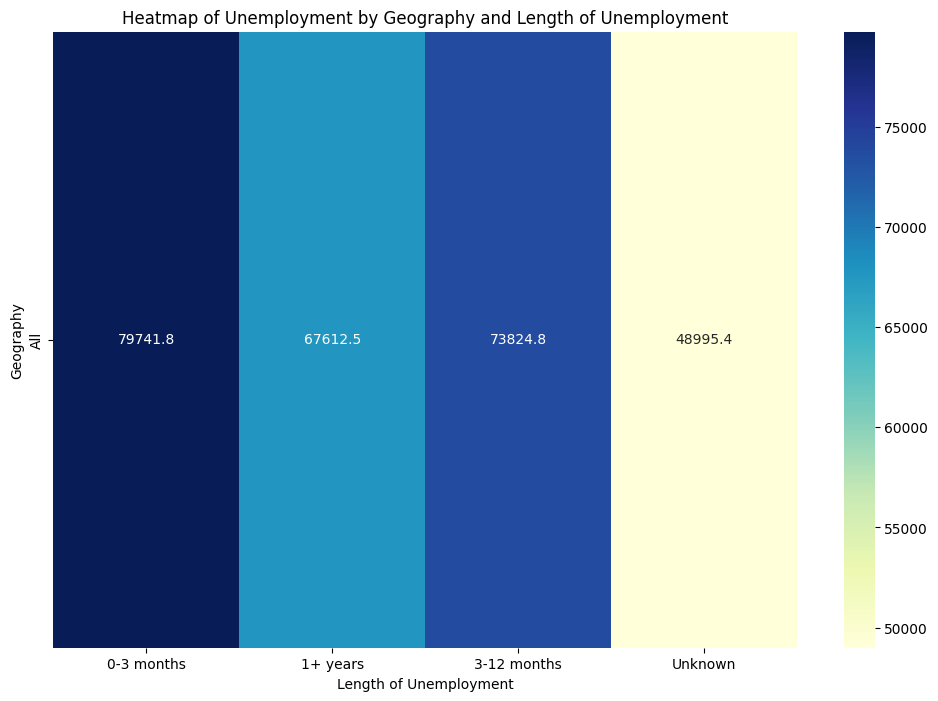

In [ ]:
# Prepare data for heatmap
heatmap_data = unemployment_data.pivot_table(
    index='geography', columns='length_of_unemployment', values='numerator', aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Unemployment by Geography and Length of Unemployment')
plt.xlabel('Length of Unemployment')
plt.ylabel('Geography')
plt.show()


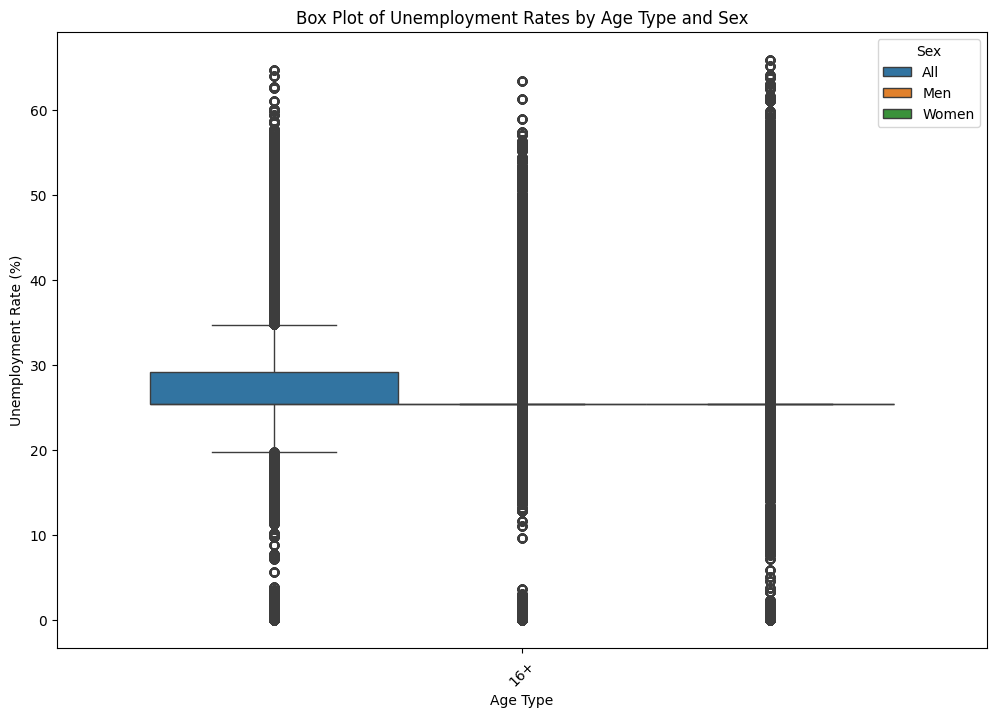

In [ ]:
# Prepare data for box plot
boxplot_data = unemployment_data.copy()
boxplot_data['unemployment_rate'] = (boxplot_data['numerator'] / boxplot_data['denominator']) * 100

# Plot box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data, x='age_type', y='unemployment_rate', hue='sex')
plt.title('Box Plot of Unemployment Rates by Age Type and Sex')
plt.xlabel('Age Type')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


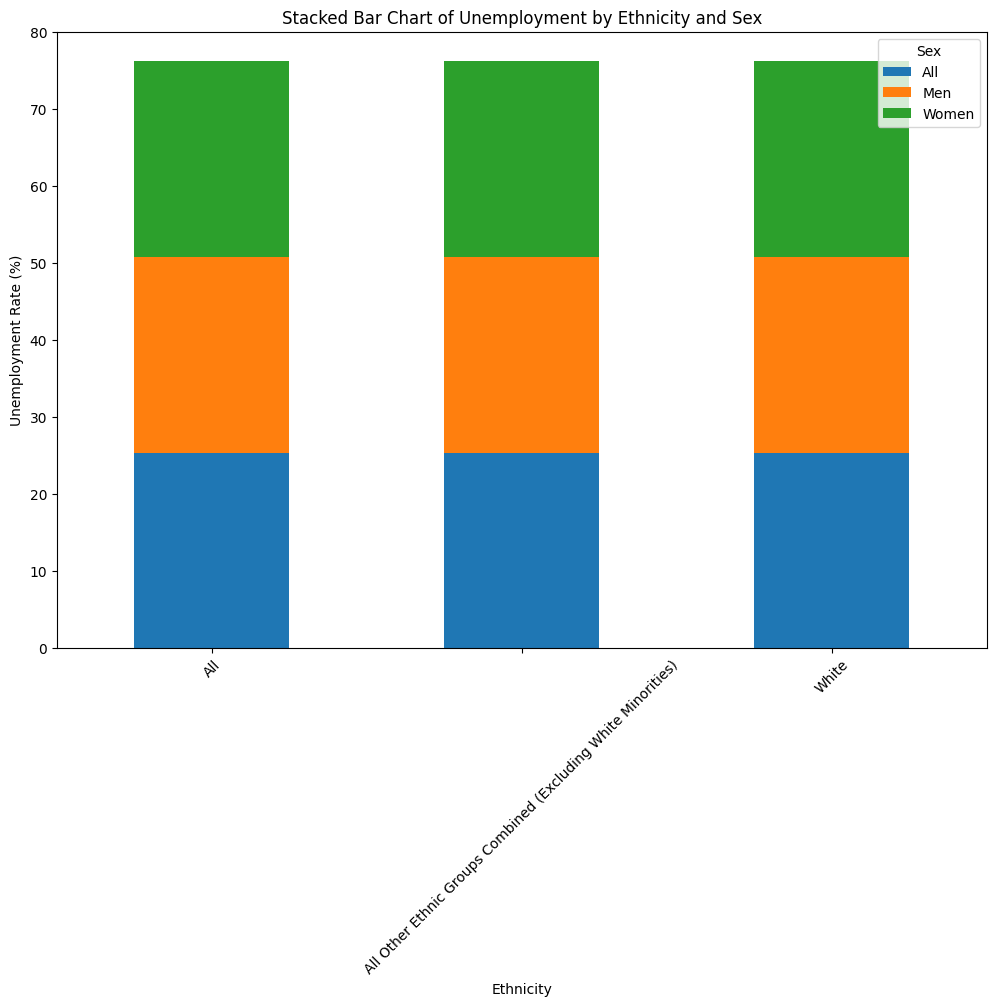

In [ ]:
# Prepare data for stacked bar chart
stacked_bar_data = unemployment_data.groupby(['ethnicity', 'sex']).apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
).unstack()

# Plot stacked bar chart
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Unemployment by Ethnicity and Sex')
plt.xlabel('Ethnicity')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


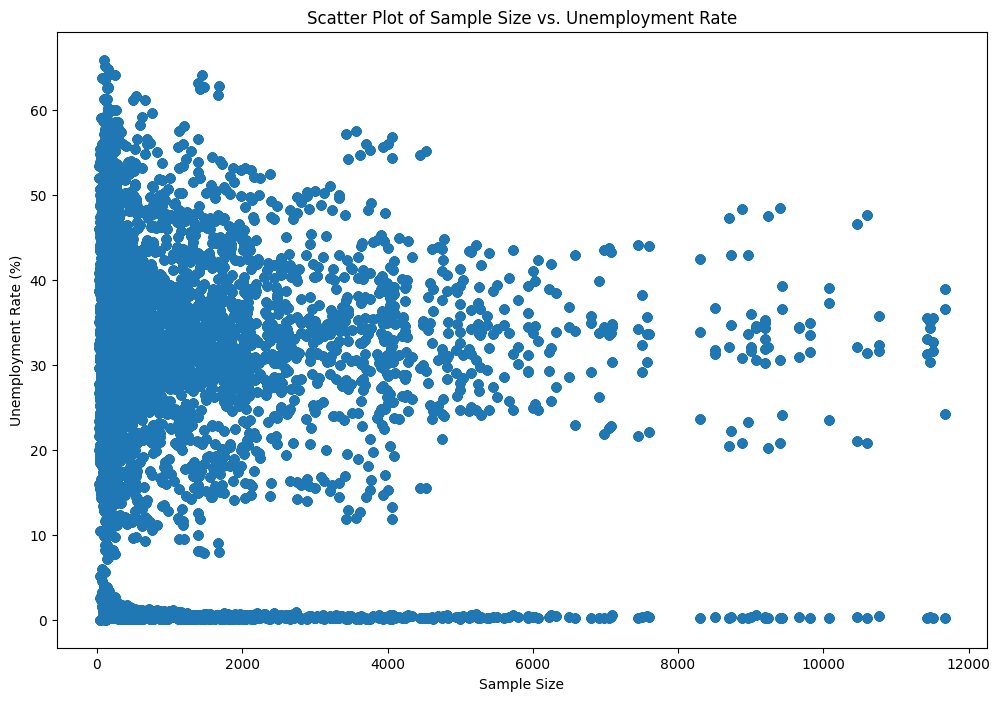

In [ ]:
# Prepare data for scatter plot
scatter_data = unemployment_data.copy()
scatter_data['unemployment_rate'] = (scatter_data['numerator'] / scatter_data['denominator']) * 100

# Plot scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(scatter_data['sample_size'], scatter_data['unemployment_rate'], alpha=0.6)
plt.title('Scatter Plot of Sample Size vs. Unemployment Rate')
plt.xlabel('Sample Size')
plt.ylabel('Unemployment Rate (%)')
plt.show()


# Building Models for Classification of Length of unemployement


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Droping columns that are  not needed for the models
data4 = data4.drop(columns=['geography', 'geography_type', 'measure'])

# Encoding categorical variables
label_encoders = {}
for column in ['length_of_unemployment', 'age_type', 'sex', 'ethnicity_type', 'ethnicity']:
    le = LabelEncoder()
    data4[column] = le.fit_transform(data4[column])
    label_encoders[column] = le

# Filling the  missing values
data4 = data4.fillna(0)

# Defining features and target variable
X = data4.drop(columns=['length_of_unemployment'])
y = data4['length_of_unemployment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((675792, 8), (168948, 8), (675792,), (168948,))

Logistic Regression Model

Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.30      0.36     42222
           1       0.25      0.67      0.36     42148
           2       0.54      0.11      0.18     42417
           3       0.60      0.28      0.38     42161

    accuracy                           0.34    168948
   macro avg       0.46      0.34      0.32    168948
weighted avg       0.46      0.34      0.32    168948

Accuracy: 0.3401105665648602


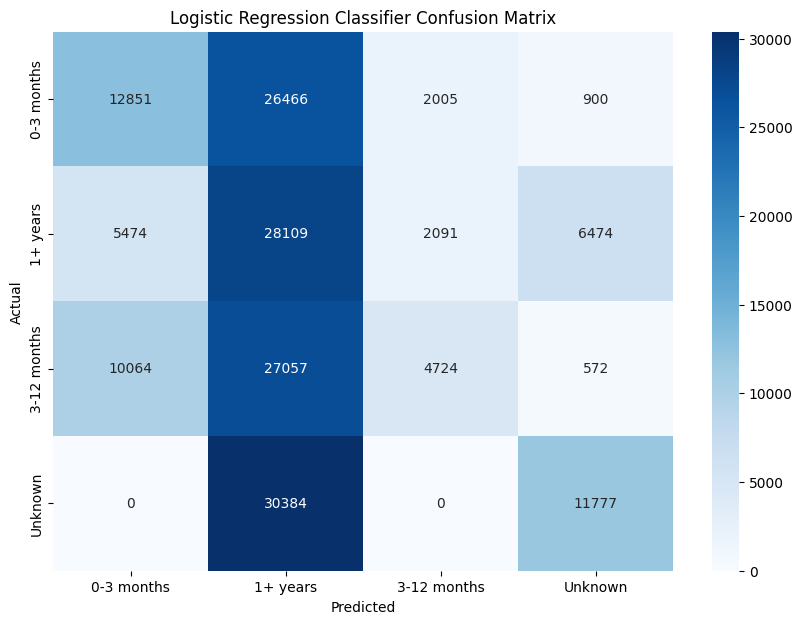

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred_log_reg, title):
    cm = confusion_matrix(y_test, y_pred_log_reg)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred_log_reg, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred_log_reg))
    print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

print_classification_report(y_test, y_pred_log_reg, "Logistic Regression Classifier")
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression Classifier Confusion Matrix")



Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.40      0.57     42222
           1       1.00      0.40      0.57     42148
           2       1.00      0.40      0.57     42417
           3       0.36      1.00      0.53     42161

    accuracy                           0.55    168948
   macro avg       0.84      0.55      0.56    168948
weighted avg       0.84      0.55      0.56    168948

Accuracy: 0.550968345289675


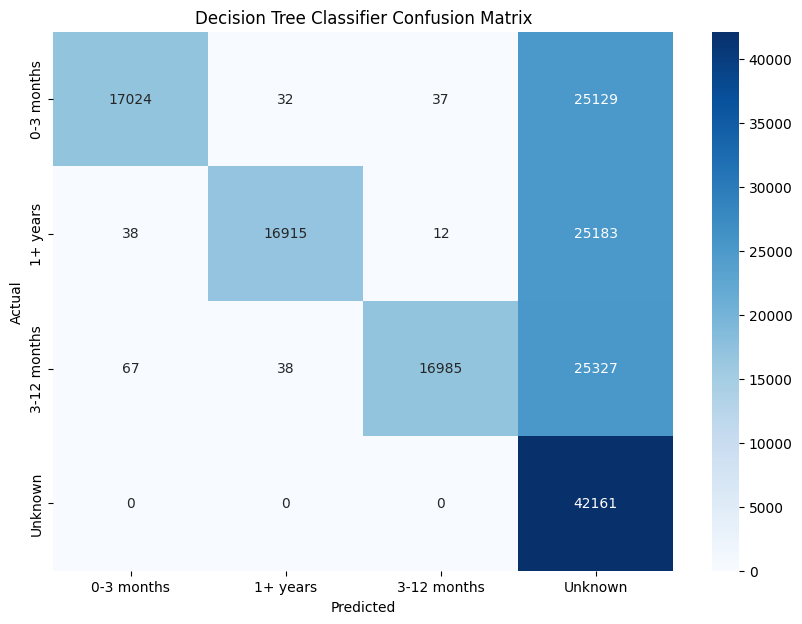

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing and training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
y_pred_decision_tree = decision_tree.predict(X_test)


# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

  # Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

 # Evaluating the model
print_classification_report(y_test, y_pred_decision_tree, "Decision Tree Classifier")
plot_confusion_matrix(y_test, y_pred_decision_tree, "Decision Tree Classifier Confusion Matrix")



Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.40      0.57     42222
           1       1.00      0.40      0.57     42148
           2       1.00      0.40      0.57     42417
           3       0.36      1.00      0.53     42161

    accuracy                           0.55    168948
   macro avg       0.84      0.55      0.56    168948
weighted avg       0.84      0.55      0.56    168948

Accuracy: 0.550968345289675


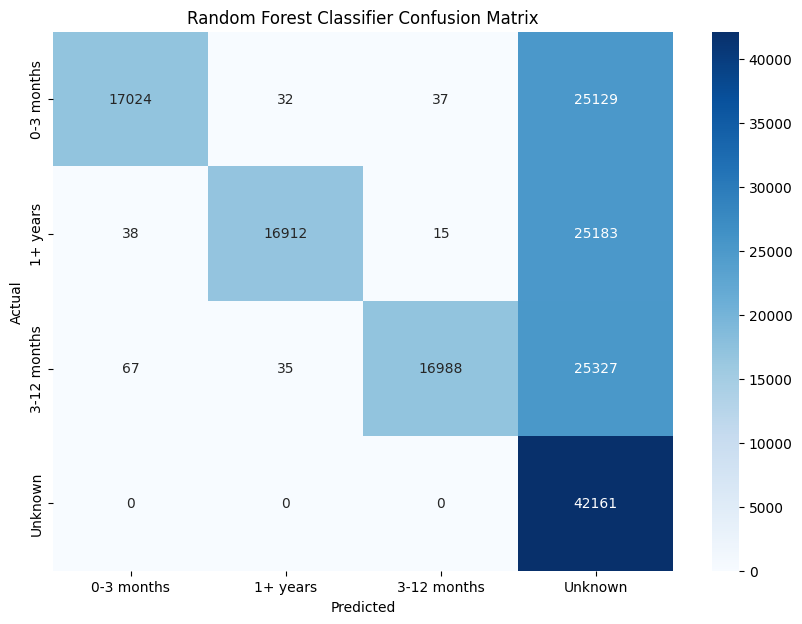

In [ ]:
# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the model
print_classification_report(y_test, y_pred_random_forest, "Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_random_forest, "Random Forest Classifier Confusion Matrix")

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:

# Check the column names
print("Column names:", data4.columns)

Column names: Index(['length_of_unemployment', 'age_type', 'sex', 'confidence_interval',
       'numerator', 'denominator', 'sample_size', 'ethnicity_type',
       'ethnicity'],
      dtype='object')


Gaussian Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.09      0.15     42222
           1       0.29      0.15      0.19     42148
           2       0.20      0.01      0.01     42417
           3       0.28      0.89      0.42     42161

    accuracy                           0.28    168948
   macro avg       0.29      0.29      0.20    168948
weighted avg       0.29      0.28      0.20    168948

Accuracy: 0.28463195776215167


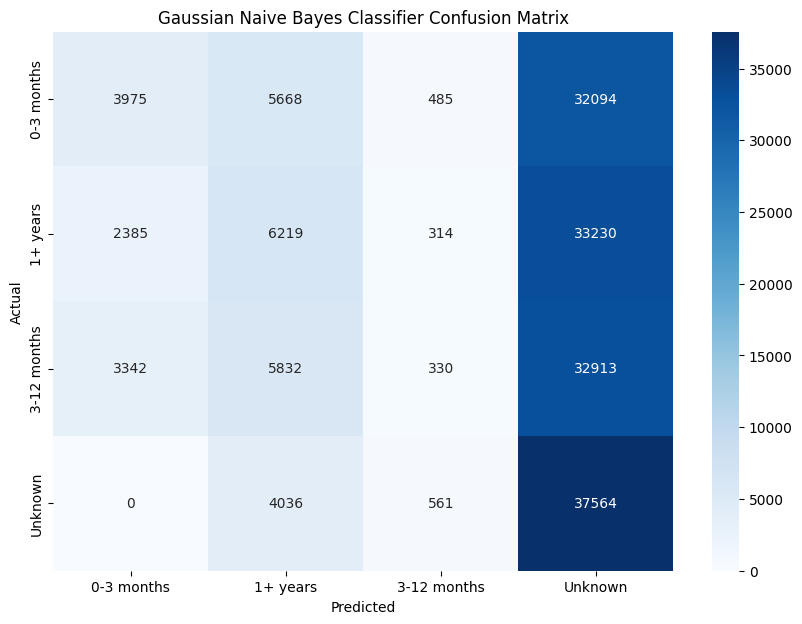

In [ ]:

# Initialize and train the Gaussian Naive Bayes model
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gaussian_nb = gaussian_nb.predict(X_test)




# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Evaluate the model
print_classification_report(y_test, y_pred_gaussian_nb, "Gaussian Naive Bayes Classifier")
plot_confusion_matrix(y_test, y_pred_gaussian_nb, "Gaussian Naive Bayes Classifier Confusion Matrix")



KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.48      0.55     42222
           1       0.46      0.63      0.53     42148
           2       0.56      0.54      0.55     42417
           3       0.51      0.47      0.49     42161

    accuracy                           0.53    168948
   macro avg       0.54      0.53      0.53    168948
weighted avg       0.54      0.53      0.53    168948

Accuracy: 0.5306484835570708


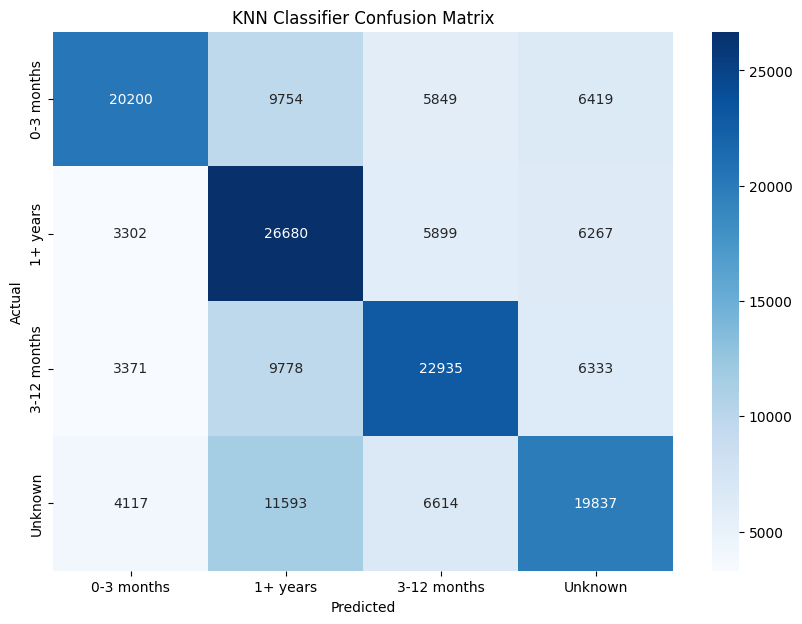

In [ ]:
# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate the model
print_classification_report(y_test, y_pred_knn, "KNN Classifier")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Classifier Confusion Matrix")


# Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Check for missing values
missing_values = data4.isnull().sum()

# Display missing values
missing_values

length_of_unemployment    0
geography                 0
geography_type            0
age_type                  0
sex                       0
confidence_interval       0
numerator                 0
denominator               0
sample_size               0
ethnicity_type            0
ethnicity                 0
measure                   0
dtype: int64

In [ ]:




# Print the column names and data types of the DataFrame
print("Column Names:\n", data4.columns)
print("\nData Types:\n", data4.dtypes)



Column Names:
 Index(['length_of_unemployment', 'geography', 'geography_type', 'age_type',
       'sex', 'confidence_interval', 'numerator', 'denominator', 'sample_size',
       'ethnicity_type', 'ethnicity', 'measure'],
      dtype='object')

Data Types:
 length_of_unemployment     object
geography                  object
geography_type             object
age_type                   object
sex                        object
confidence_interval       float64
numerator                 float64
denominator               float64
sample_size               float64
ethnicity_type             object
ethnicity                  object
measure                    object
dtype: object


In [ ]:
# Define the categorical and numerical columns (adjusted to match the actual columns)
categorical_cols = ['length_of_unemployment', 'age_type', 'sex', 'ethnicity_type', 'ethnicity']
numerical_cols = ['confidence_interval', 'numerator', 'denominator', 'sample_size']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessing pipeline to the data
preprocessed_data = preprocessor.fit_transform(data4)

# Convert the preprocessed data to a DataFrame for better readability
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = np.append(numerical_cols, encoded_cat_columns)
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_columns)

# Display the first few rows of the preprocessed data
print(preprocessed_df.head())

   confidence_interval  numerator  denominator  sample_size  \
0            -1.576501    3.64967      1.34374     2.609527   
1            -1.576501    3.64967      1.34374     2.609527   
2            -1.576501    3.64967      1.34374     2.609527   
3            -1.576501    3.64967      1.34374     2.609527   
4            -1.576501    3.64967      1.34374     2.609527   

   length_of_unemployment_0-3 months  length_of_unemployment_1+ years  \
0                                1.0                              0.0   
1                                1.0                              0.0   
2                                1.0                              0.0   
3                                1.0                              0.0   
4                                1.0                              0.0   

   length_of_unemployment_3-12 months  length_of_unemployment_Unknown  \
0                                 0.0                             0.0   
1                                 0.

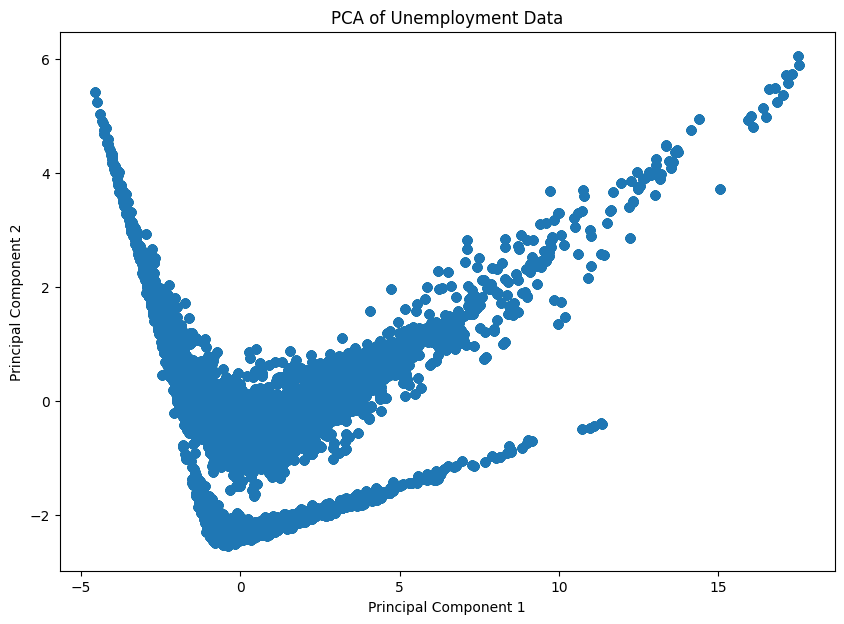

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(preprocessed_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Unemployment Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

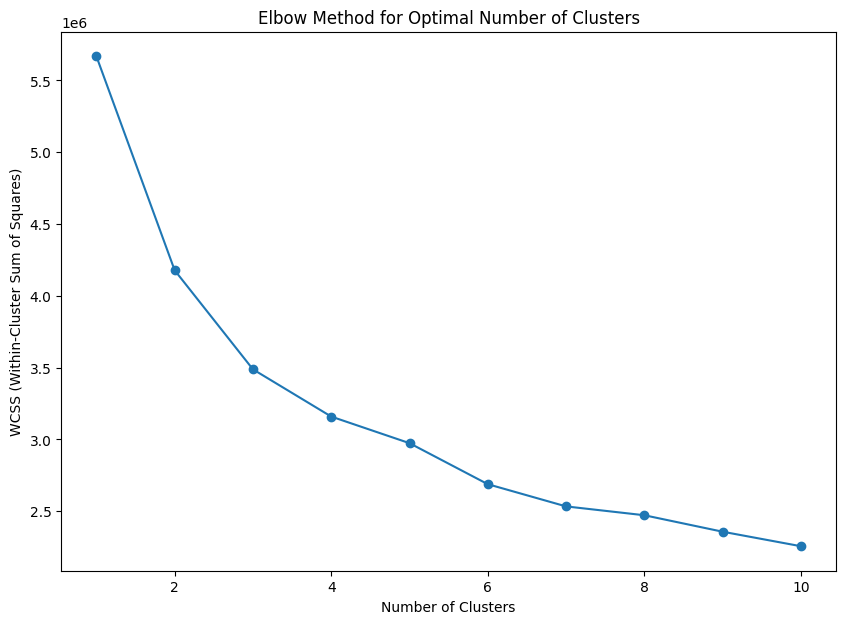

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(preprocessed_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


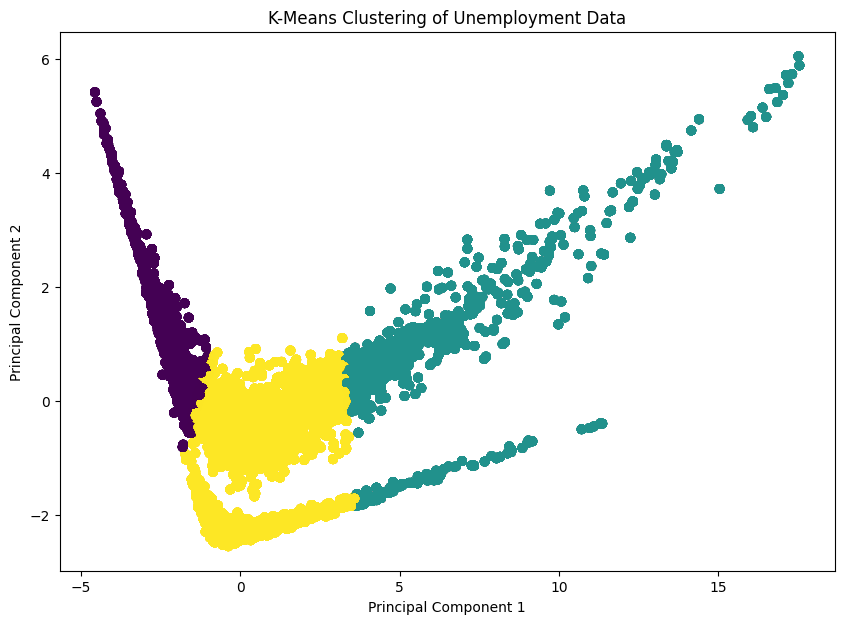

In [ ]:
# Apply K-Means clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(preprocessed_df)

# Add the cluster labels to the PCA DataFrame for visualization
pca_df['Cluster'] = kmeans_labels

# Plot the K-Means clustering results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Unemployment Data')
plt.show()


# Detecting Anamolies

In [ ]:
# Display the first few rows of data4
data4.head()

,length_of_unemployment,geography,geography_type,age_type,sex,confidence_interval,numerator,denominator,sample_size,ethnicity_type,ethnicity,measure
0,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
1,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
2,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
3,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
4,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed


In [ ]:
data4['unemployment_rate'] = data4['numerator'] / data4['denominator']


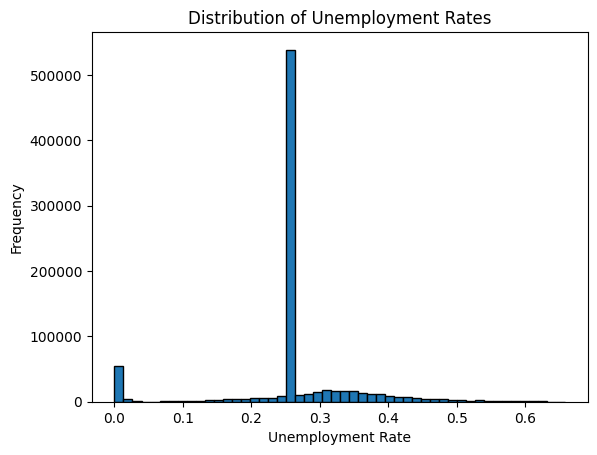

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data4['unemployment_rate'].dropna(), bins=50, edgecolor='k')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


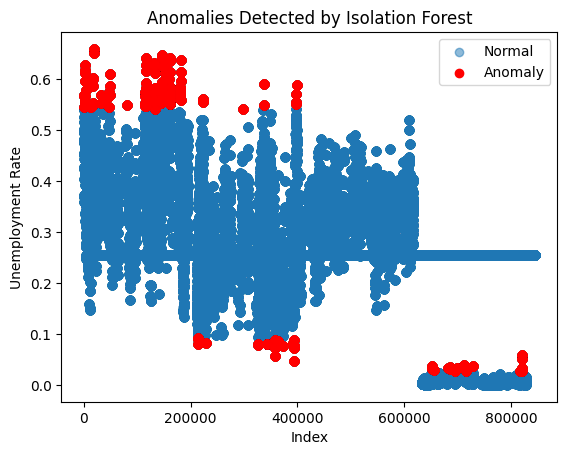

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01)
data4['anomaly_iso'] = iso.fit_predict(data4[['unemployment_rate']])

# Visualize anomalies
anomalies_iso = data4[data4['anomaly_iso'] == -1]
plt.scatter(data4.index, data4['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_iso.index, anomalies_iso['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


In [ ]:
# Display column names and statistical summary of the dataset
data4.columns, data4.describe()


(Index(['length_of_unemployment', 'geography', 'geography_type', 'age_type',
        'sex', 'confidence_interval', 'numerator', 'denominator', 'sample_size',
        'ethnicity_type', 'ethnicity', 'measure', 'unemployment_rate',
        'anomaly_iso'],
       dtype='object'),
        confidence_interval      numerator   denominator    sample_size  \
 count        844740.000000  844740.000000  8.447400e+05  844740.000000   
 mean              6.306480   67543.619910  2.658548e+05    1228.605430   
 std               3.048829   67610.632017  2.142865e+05    1083.873258   
 min               0.100000       0.000000  3.000000e+03      30.000000   
 25%               6.306480   52075.000000  2.513000e+05    1114.000000   
 50%               6.306480   67543.619910  2.658548e+05    1228.605430   
 75%               6.306480   67543.619910  2.658548e+05    1228.605430   
 max              28.200000  912200.000000  2.476600e+06   11671.000000   
 
        unemployment_rate    anomaly_iso  
 co

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


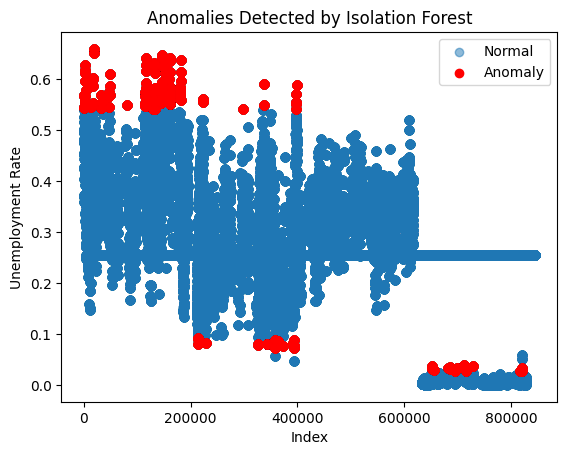

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01)
data4['anomaly_iso'] = iso.fit_predict(data4[['unemployment_rate']])

# Visualize anomalies
anomalies_iso = data4[data4['anomaly_iso'] == -1]
plt.scatter(data4.index, data4['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_iso.index, anomalies_iso['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


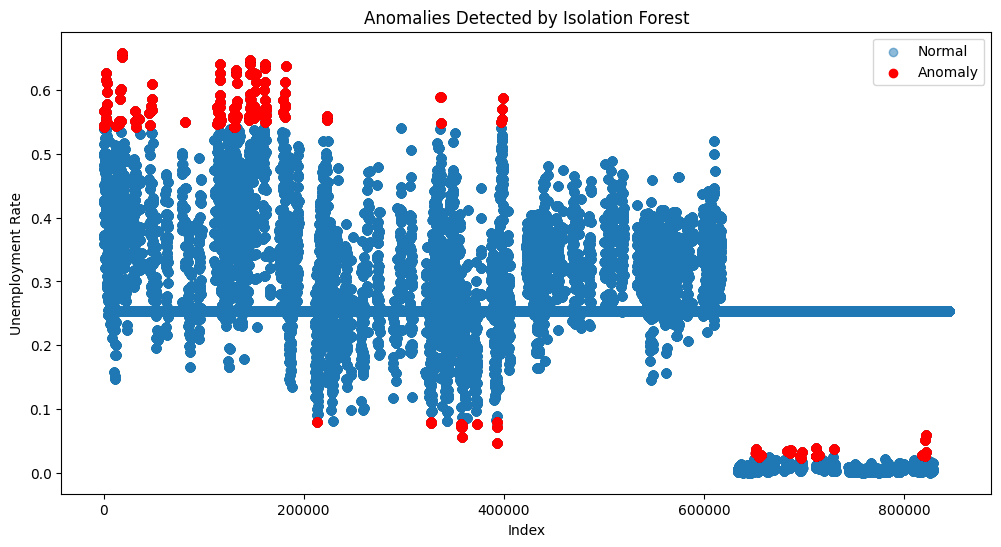

In [ ]:
from sklearn.ensemble import IsolationForest

# Step 3: Apply Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
data4['anomaly_iso'] = iso.fit_predict(data4[['unemployment_rate']])

# Visualize anomalies
anomalies_iso = data4[data4['anomaly_iso'] == -1]
plt.figure(figsize=(12, 6))
plt.scatter(data4.index, data4['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_iso.index, anomalies_iso['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


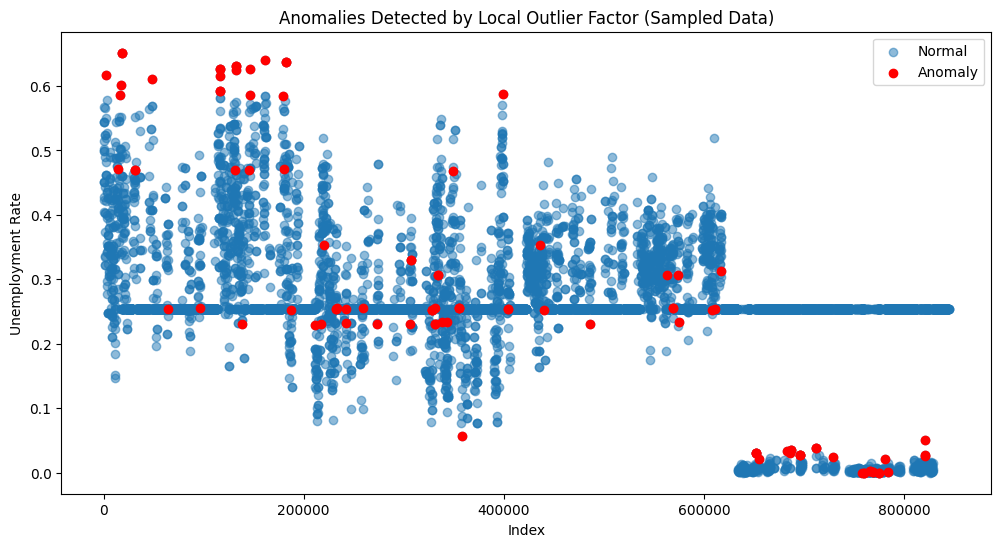

In [ ]:

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# 1: Randomly sampling a subset of the data
data4_sample = data4.sample(n=10000, random_state=42)

#2: Applying Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
data4_sample['anomaly_lof'] = lof.fit_predict(data4_sample[['unemployment_rate']])

#3: Visualizing anomalies
anomalies_lof = data4_sample[data4_sample['anomaly_lof'] == -1]
plt.figure(figsize=(12, 6))
plt.scatter(data4_sample.index, data4_sample['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_lof.index, anomalies_lof['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Local Outlier Factor (Sampled Data)')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()



In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# Preprocessing: Normalize the data
scaler = StandardScaler()
data4_sample_normalized = scaler.fit_transform(data4_sample[['unemployment_rate']])

# Define the Autoencoder
input_dim = data4_sample_normalized.shape[1]
encoding_dim = 2  # You can adjust this value
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(data4_sample_normalized, data4_sample_normalized,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_split=0.1)


Epoch 1/50
282/282 [==============================] - 5s 8ms/step - loss: 0.9617 - val_loss: 0.9229
Epoch 2/50
282/282 [==============================] - 1s 4ms/step - loss: 0.8285 - val_loss: 0.8171
Epoch 3/50
282/282 [==============================] - 1s 2ms/step - loss: 0.7514 - val_loss: 0.7609
Epoch 4/50
282/282 [==============================] - 1s 2ms/step - loss: 0.7120 - val_loss: 0.7328
Epoch 5/50
282/282 [==============================] - 0s 2ms/step - loss: 0.6921 - val_loss: 0.7182
Epoch 6/50
282/282 [==============================] - 1s 2ms/step - loss: 0.6814 - val_loss: 0.7101
Epoch 7/50
282/282 [==============================] - 0s 2ms/step - loss: 0.6753 - val_loss: 0.7053
Epoch 8/50
282/282 [==============================] - 1s 2ms/step - loss: 0.6715 - val_loss: 0.7023
Epoch 9/50
282/282 [==============================] - 0s 2ms/step - loss: 0.6691 - val_loss: 0.7003
Epoch 10/50
282/282 [==============================] - 1s 2ms/step - loss: 0.6675 - val_loss: 0.6989

313/313 [==============================] - 1s 2ms/step


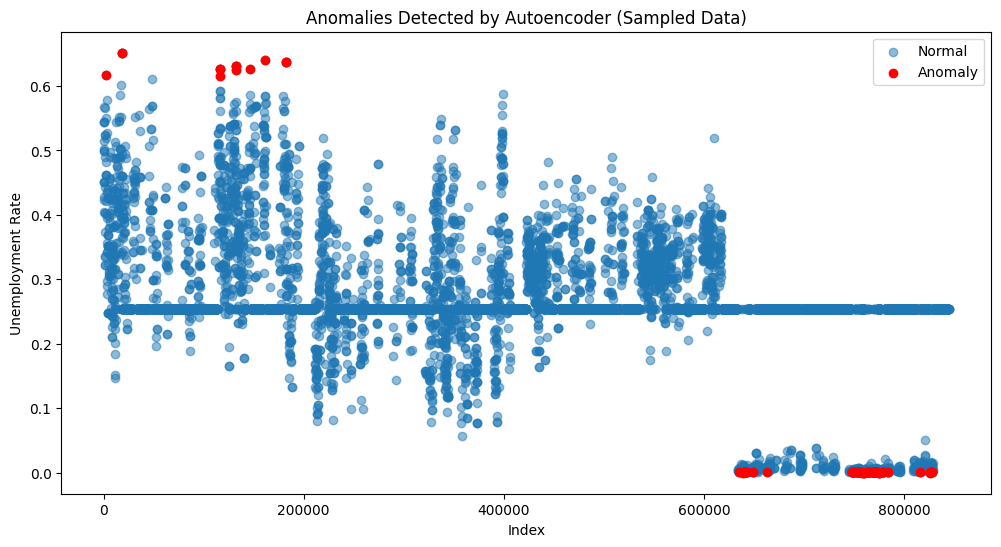

In [ ]:
# Get the reconstructed data
reconstructed_data = autoencoder.predict(data4_sample_normalized)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.power(data4_sample_normalized - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 99)  # You can adjust the percentile

# Identify anomalies
data4_sample['anomaly_autoencoder'] = reconstruction_error > threshold

# Visualize anomalies
anomalies_autoencoder = data4_sample[data4_sample['anomaly_autoencoder'] == True]
plt.figure(figsize=(12, 6))
plt.scatter(data4_sample.index, data4_sample['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_autoencoder.index, anomalies_autoencoder['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Autoencoder (Sampled Data)')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


#	Forecasting Demographic-Specific Unemployment Trends:

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/unemployement/modified_data3.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()



,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,All,All,Jan2004-Dec2004,year,All,Great Britain,16-24,16+,All,12.3,0.3,553800,4488200,49218
1,All,All,Jan2005-Dec2005,year,All,Great Britain,16-24,16+,All,13,0.3,591300,4536300,46261
2,All,All,Jan2006-Dec2006,year,All,Great Britain,16-24,16+,All,13.9,0.4,637900,4575700,33854
3,All,All,Jan2007-Dec2007,year,All,Great Britain,16-24,16+,All,13.8,0.4,638900,4613200,33686
4,All,All,Jan2008-Dec2008,year,All,Great Britain,16-24,16+,All,15.1,0.4,700200,4629400,32709


In [ ]:
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format for better time series handling
data['time'] = pd.to_datetime(data['time'], format='%b%Y-%b%Y')

# Sort data by time
data = data.sort_values(by='time')

# Extract the relevant columns for time series analysis
time_series_data = data[['time', 'value']]

# Convert the 'value' column to numeric, if not already
time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')

# Plot the unemployment rates over time
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['time'], time_series_data['value'], marker='o', linestyle='-')
plt.title('Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


<ipython-input-25-b480db906703>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')


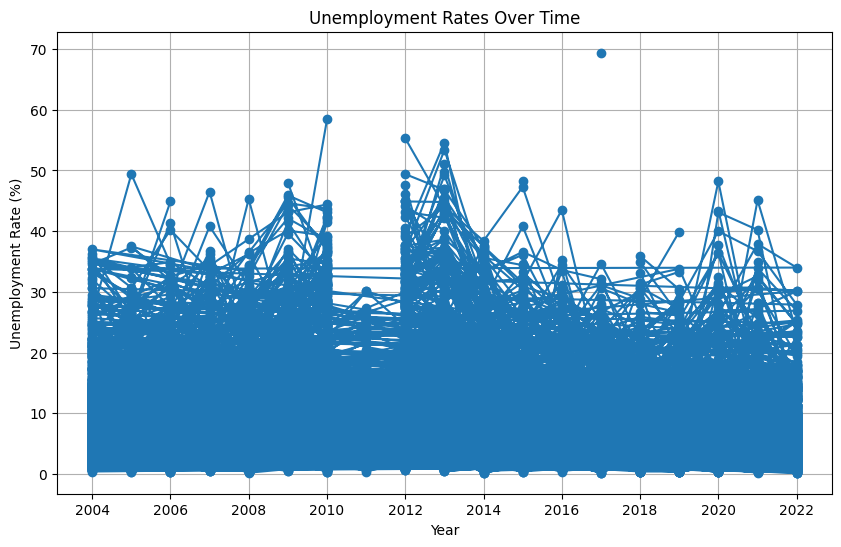

In [ ]:

# Since the date format is not straightforward, let's extract the years manually and create a datetime index
data['year'] = data['time'].str.extract(r'(\d{4})').astype(int)

# Create a new datetime column with just the year for simplicity
data['datetime'] = pd.to_datetime(data['year'], format='%Y')

# Extract the relevant columns for time series analysis
time_series_data = data[['datetime', 'value']]

# Convert the 'value' column to numeric, if not already
time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')

# Plot the unemployment rates over time
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['datetime'], time_series_data['value'], marker='o', linestyle='-')
plt.title('Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


<ipython-input-26-b480db906703>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')


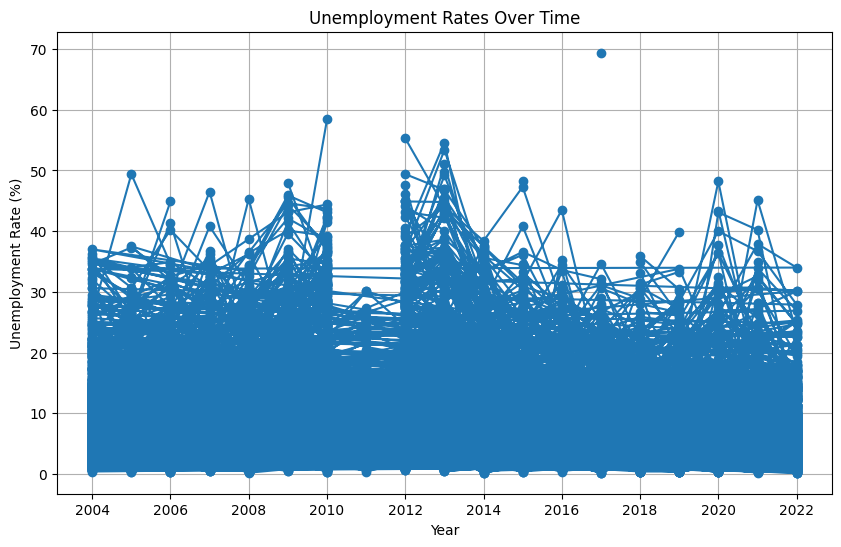

In [ ]:

# Since the date format is not straightforward, let's extract the years manually and create a datetime index
data['year'] = data['time'].str.extract(r'(\d{4})').astype(int)

# Create a new datetime column with just the year for simplicity
data['datetime'] = pd.to_datetime(data['year'], format='%Y')

# Extract the relevant columns for time series analysis
time_series_data = data[['datetime', 'value']]

# Convert the 'value' column to numeric, if not already
time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')

# Plot the unemployment rates over time
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['datetime'], time_series_data['value'], marker='o', linestyle='-')
plt.title('Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Perform Augmented Dickey-Fuller test to check stationarity
result = adfuller(time_series_data['value'].dropna())

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_test_results = {
    'ADF Statistic': adf_statistic,
    'p-value': p_value,
    'Critical Values': critical_values
}

adf_test_results


{'ADF Statistic': -14.34006763132592,
 'p-value': 1.063748869165023e-26,
 'Critical Values': {'1%': -3.4306531884634515,
  '5%': -2.861673999182611,
  '10%': -2.566841324010066}}

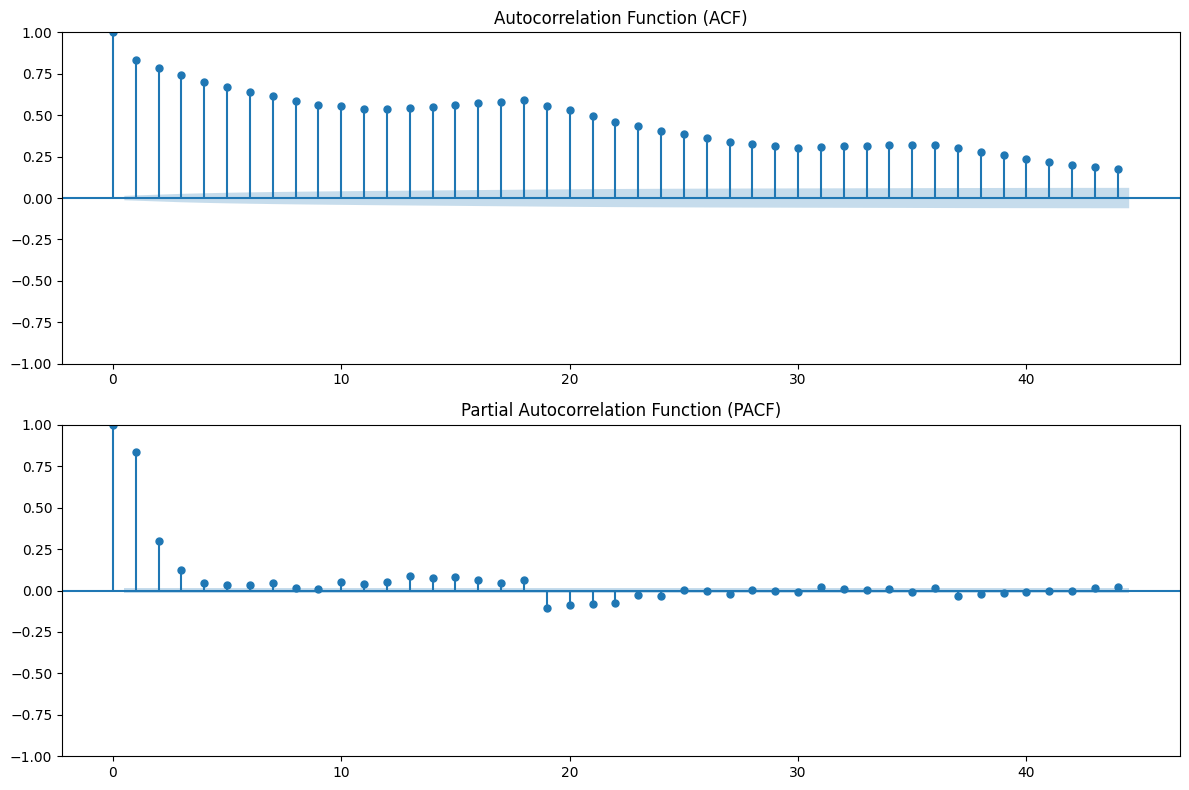

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(time_series_data['value'].dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(time_series_data['value'].dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()



In [ ]:
# Drop rows with NaN values in the 'value' column
time_series_data_clean = time_series_data.dropna(subset=['value'])

# Split the cleaned data into training and test sets
train_size = int(len(time_series_data_clean) * 0.8)
train, test = time_series_data_clean['value'][:train_size], time_series_data_clean['value'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(1, 0, 1))
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test, predictions)

mse



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

71.93215331347704

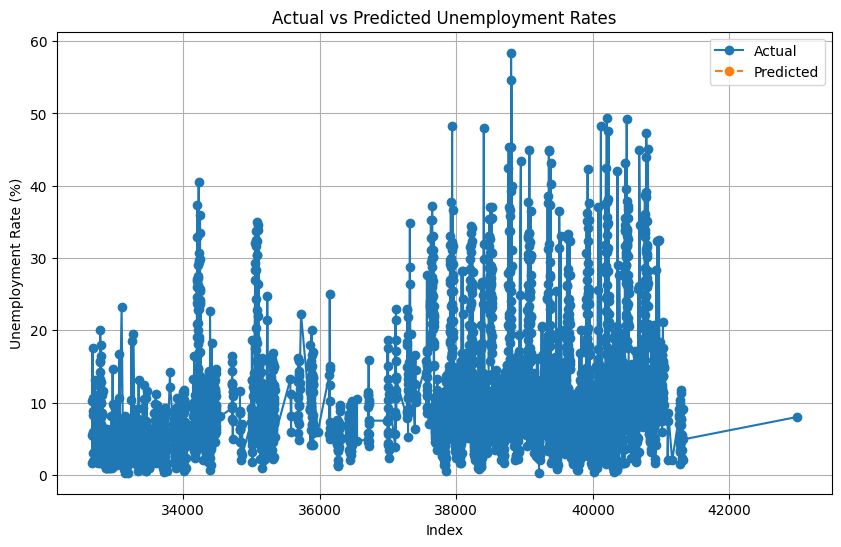

In [ ]:
# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'Actual': test.values,
    'Predicted': predictions
}, index=test.index)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], marker='o', linestyle='-', label='Actual')
plt.plot(comparison_df.index, comparison_df['Predicted'], marker='o', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted Unemployment Rates')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Fit the ARIMA(2,0,2) model
model_2 = ARIMA(train, order=(2, 0, 2))
fitted_model_2 = model_2.fit()

# Make predictions
predictions_2 = fitted_model_2.forecast(steps=len(test))

# Calculate the mean squared error
mse_2 = mean_squared_error(test, predictions_2)

mse_2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

71.93332422772274

In [ ]:
# Fit the final ARIMA(1,0,1) model on the entire dataset
final_model = ARIMA(time_series_data_clean['value'], order=(1, 0, 1))
fitted_final_model = final_model.fit()

# Forecast future unemployment rates for the next 5 years
forecast_periods = 5
forecast = fitted_final_model.forecast(steps=forecast_periods)

# Create a dataframe for the forecasted values
forecast_index = pd.date_range(start=time_series_data_clean['datetime'].max() + pd.DateOffset(years=1), periods=forecast_periods, freq='Y')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Unemployment Rate'])

import ace_tools as tools; tools.display_dataframe_to_user(name="Forecasted Unemployment Rates", dataframe=forecast_df)

# Display the forecasted values
forecast_df


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
asted values
forecast_values

KeyError: "None of ['datetime'] are in the columns"

In [ ]:
# Extract the years manually and create a datetime index
data['year'] = data['time'].str.extract(r'(\d{4})').astype(int)

# Create a new datetime column with just the year for simplicity
data['datetime'] = pd.to_datetime(data['year'], format='%Y')

# Extract the relevant columns for time series analysis
time_series_data = data[['datetime', 'value']]

# Convert the 'value' column to numeric, if not already
time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')

# Drop rows with NaN values in the 'value' column
time_series_data_clean = time_series_data.dropna(subset=['value'])

# Ensure the datetime index is set correctly
time_series_data_clean.set_index('datetime', inplace=True)

# Fit the final ARIMA(1,0,1) model on the entire dataset
final_model = ARIMA(time_series_data_clean['value'], order=(1, 0, 1))
fitted_final_model = final_model.fit()

# Forecast future unemployment rates for the next 5 years
forecast_periods = 5
forecast = fitted_final_model.get_forecast(steps=forecast_periods)
forecast_df = forecast.summary_frame()

# Create a new index for the forecasted periods
forecast_index = pd.date_range(start=time_series_data_clean.index.max() + pd.DateOffset(years=1), periods=forecast_periods, freq='Y')
forecast_df.index = forecast_index

# Extract the forecasted values
forecast_values = forecast_df['mean'].rename('Forecasted Unemployment Rate')

# Display the forecasted values
print(forecast_values)

<ipython-input-40-c748eb72c7a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['value'] = pd.to_numeric(time_series_data['value'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has b

2023-12-31    6.708396
2024-12-31    6.780585
2025-12-31    6.848843
2026-12-31    6.913386
2027-12-31    6.974414
Freq: A-DEC, Name: Forecasted Unemployment Rate, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Identifying The factors affecting Unemployement

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/unemployement/modified_data3.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,All,All,Jan2004-Dec2004,year,All,Great Britain,16-24,16+,All,12.3,0.3,553800,4488200,49218
1,All,All,Jan2005-Dec2005,year,All,Great Britain,16-24,16+,All,13,0.3,591300,4536300,46261
2,All,All,Jan2006-Dec2006,year,All,Great Britain,16-24,16+,All,13.9,0.4,637900,4575700,33854
3,All,All,Jan2007-Dec2007,year,All,Great Britain,16-24,16+,All,13.8,0.4,638900,4613200,33686
4,All,All,Jan2008-Dec2008,year,All,Great Britain,16-24,16+,All,15.1,0.4,700200,4629400,32709


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Drop rows with missing values in essential columns
data_clean = data.dropna(subset=['value', 'ethnicity', 'time', 'geography', 'age', 'sex'])

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['ethnicity', 'ethnicity_type', 'time', 'time_type', 'geography', 'geography_type', 'age', 'age_type', 'sex']:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le

# Convert 'value' to numeric
data_clean['value'] = pd.to_numeric(data_clean['value'], errors='coerce')

# Define features and target variable
X = data_clean[['ethnicity', 'ethnicity_type', 'time', 'time_type', 'geography', 'geography_type', 'age', 'age_type', 'sex']]
y = data_clean['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the cleaned and processed data
data_clean.head()


,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,0,0,0,0,0,0,0,0,0,12.3,0.3,553800,4488200,49218
1,0,0,1,0,0,0,0,0,0,13.0,0.3,591300,4536300,46261
2,0,0,2,0,0,0,0,0,0,13.9,0.4,637900,4575700,33854
3,0,0,3,0,0,0,0,0,0,13.8,0.4,638900,4613200,33686
4,0,0,4,0,0,0,0,0,0,15.1,0.4,700200,4629400,32709


In [ ]:
# Check for missing values in the target variable
missing_values_count = y.isnull().sum()
total_values_count = len(y)
missing_percentage = (missing_values_count / total_values_count) * 100

missing_values_count, missing_percentage



(22842, 51.37651821862348)

In [ ]:
# Impute missing values in the target variable with the median
y_imputed = y.fillna(y.median())

# Verify that there are no more missing values in the target variable
y_imputed.isnull().sum()


0

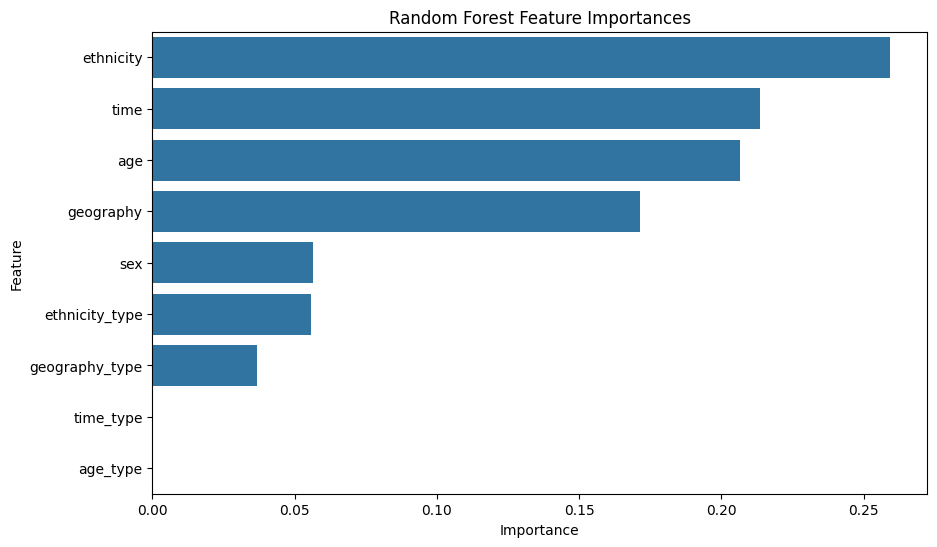

In [ ]:
# Redefine the features variable
features = X.columns

# Create a DataFrame for feature importances
importances_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
importances_rf = importances_rf.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_rf)
plt.title('Random Forest Feature Importances')
plt.show()


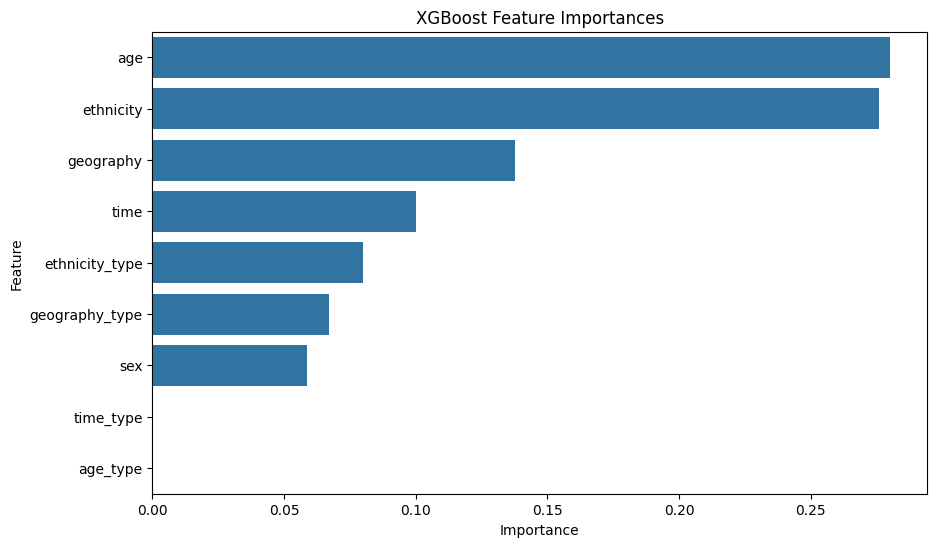

In [ ]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_imputed.loc[X_train.index])

# Get feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importances_xgb = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgb})
importances_xgb = importances_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_xgb)
plt.title('XGBoost Feature Importances')
plt.show()


In [ ]:
!pip install shap


100%|===================| 35567/35568 [54:57<00:00]       

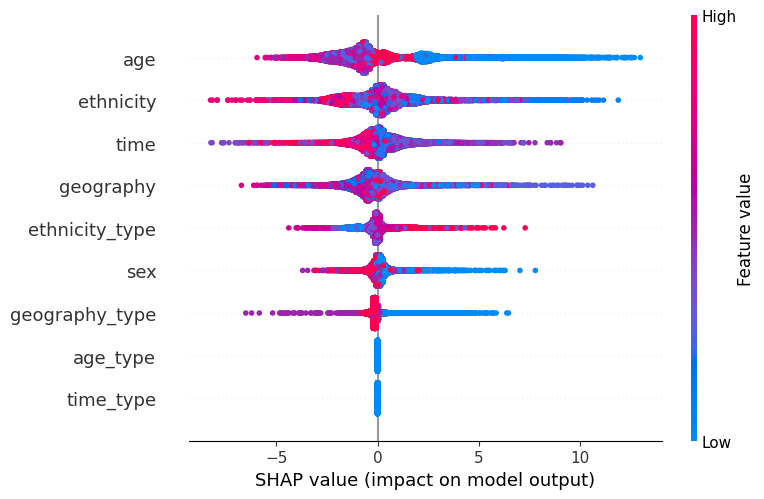

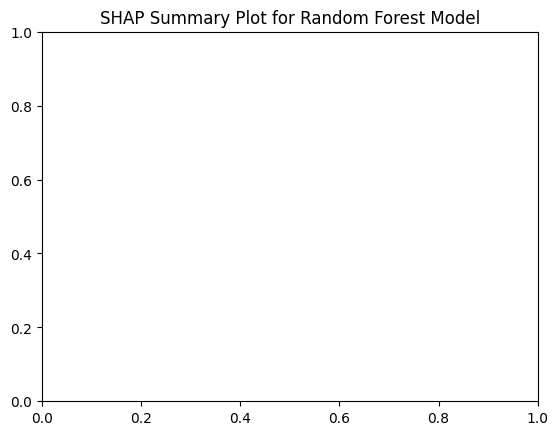

100%|===================| 35445/35568 [00:29<00:00]       

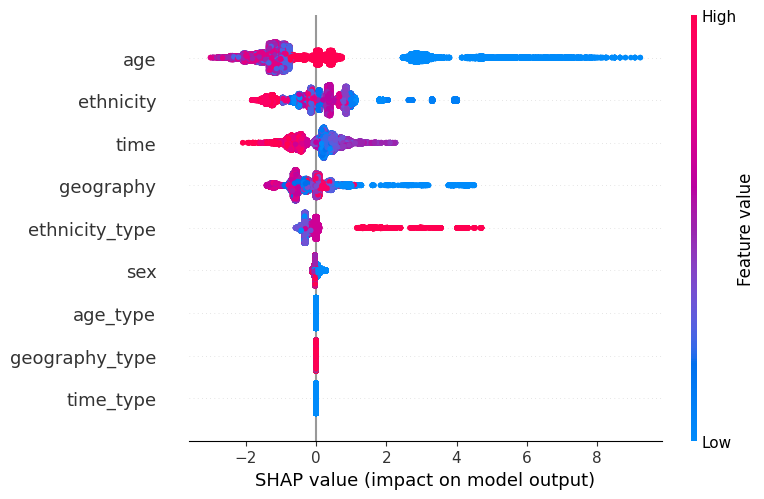

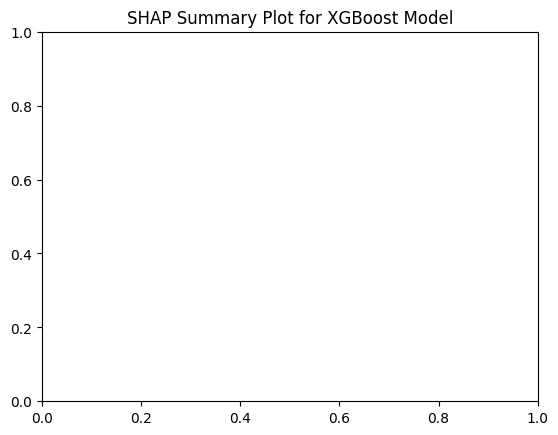

In [ ]:
import shap

# Initialize the SHAP explainer for the Random Forest model
explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_train)

# Plot SHAP summary plot for the Random Forest model
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf, X_train)
plt.title('SHAP Summary Plot for Random Forest Model')
plt.show()

# Initialize the SHAP explainer for the XGBoost model
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_train)

# Plot SHAP summary plot for the XGBoost model
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb, X_train)
plt.title('SHAP Summary Plot for XGBoost Model')
plt.show()
